In [1]:
!pip install -U albumentations
!pip install ttach
!pip install torch-lr-finder

In [2]:
!git clone "https://github.com/vvshankar78/Pytorch_Wrapper.git"
!git clone "https://github.com/jacobgil/pytorch-grad-cam.git"

fatal: destination path 'Pytorch_Wrapper' already exists and is not an empty directory.
fatal: destination path 'pytorch-grad-cam' already exists and is not an empty directory.


In [3]:
import requests, zipfile, io
import sys, os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torchvision
# Download Data
import requests, zipfile, io
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models
from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import OneCycleLR, ReduceLROnPlateau
from torchsummary import summary

import os
import urllib.request
import zipfile
from random import shuffle
from math import floor
import sys, os

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [4]:

my_path = '/content/Pytorch_Wrapper'
sys.path.append(my_path)
from config import ModelConfig
from data.data_download import download_dataset, unzip_data, format_val
from data import data_engine
from data.data_engine import DataEngine
import main

### Download TinyImage Data

In [5]:
main.download_data_prep()

Beginning dataset download with urllib2
Dataset downloaded
Extracting zip file: /content/tiny-imagenet-200.zip
Extracted at: /content
Formatting: /content/tiny-imagenet-200/val
Cleaning up: /content/tiny-imagenet-200/val/images
Formatting val done


### Generate Data Loader

In [6]:
data,train_loader, val_loader = main.get_data()

Model Parameters:
{ 'batch_size_cpu': 128,
  'batch_size_cuda': 256,
  'dataset': 'Imagenet',
  'dropout': 0,
  'dropout_value': 0.0,
  'epochs': 50,
  'l1_decay': 0,
  'l2_decay': 0.005,
  'lr': 0.001,
  'momentum': 0.9,
  'num_workers': 4,
  'peak': 10,
  'seed': 1,
  'target_zip': '/tiny-imagenet-200.zip',
  'train_data_path': '/tiny-imagenet-200/train',
  'train_data_path_engine': '/content/tiny-imagenet-200/train',
  'url': 'http://cs231n.stanford.edu/tiny-imagenet-200.zip',
  'val_data_path': '/tiny-imagenet-200/val',
  'val_data_path_engine': '/content/tiny-imagenet-200/val'}
50
generating datasets for Imagenet


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


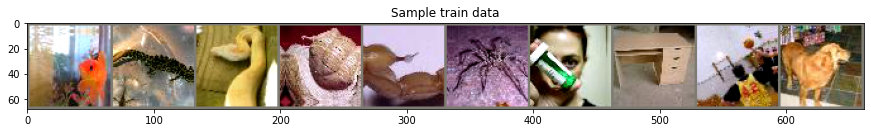

In [7]:
main.show_data(data)

### Load Model

In [8]:
model= main.get_model()
main.show_model_summary(model, (3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

### Get LR Finder


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 8.11E+00


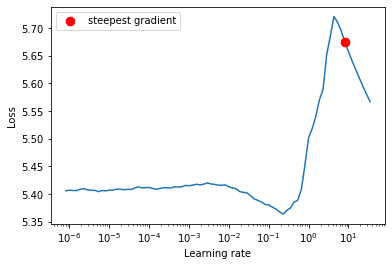

In [9]:
main.get_lr_finder(model, train_loader)

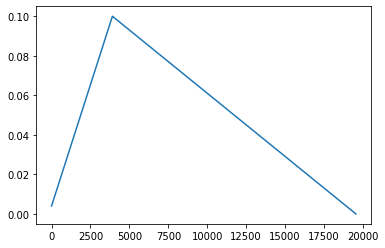

In [10]:
model= main.get_model()
main.get_ocp_plot(train_loader, model, max_lr=0.1) # max lr is considered 10 time suggested lr from lr finder

### Train Model

In [ ]:
history = main.run_model(model, train_loader, val_loader, max_lr=0.1)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=4.0563435554504395 Batch_id=390 Accuracy=7.88: 100%|██████████| 391/391 [01:34<00:00,  4.12it/s]

length of Average loss 391, length of Average accuracy 391

learning rate 0.01360245587106677



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0168, Accuracy: 1055/10000 (10.55%)
EPOCH: 2


Loss=3.688805103302002 Batch_id=187 Accuracy=16.88:  48%|████▊     | 188/391 [00:45<00:49,  4.13it/s]

In [ ]:
main.get_training_curves(history)